Fourier Transform is used to analyze the frequency characteristics of various filters. 

for images, 2D Discrete Fourier Transform(DFT) is used to find the frequency domain. 

FFT Algorithm is used for the calculation of DFT. 

If a signal is sampled to form a discrete signal, we get the same frequency domain, but periodic in range. 

this idea of varying frequency can be used to identify edge poitns or noises. edges and noises are high frequency contents in an image. if there is no much changes in amplitude, it is a low frequency component. 

## Fourier Transform in Numpy

Fourier transform can be done using Numpy. 

Numpy has a FFT package to do this. 

**np.fft.fft2()** provides the frequency transform which will be a complex arrya. the first agurment is a grayscale image, and the second argument gives the size of the output array. if it is greater than the input image size, it is padded with zeros. if it is less than input image size, it is cropped. 

the zero frequency component (DC component) will be at the top left corner. to bring it to the center, we need to shift it by N/2 in both directions. this is done using **np.fft.fftshift()**. Once we find the frequency transform, we can find the magnitude spectrum. 



In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('../sample_imgs/rasenshuriken.jpeg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 10*np.log(abs(fshift))



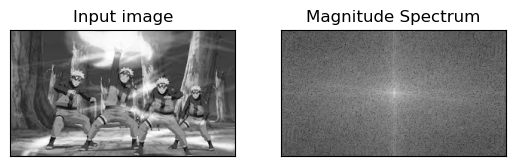

In [5]:
plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Input image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

now that we know the frequency transform, we can do some operations on the frequency domain, like high pass filtering and reconstruct the image i.e find the inverse DFT. for that, we can simply the low frequencies by masking with a rectangular window of size 60 x 60. 

then, we apply the inverse shift using **np.fft.iffshift()** so that the DC component will again come at the top-let corner. then, we find the inverse FFT using **np.ifft2()**

In [8]:
rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2)
fshift[crow-30 : crow+30, ccol-30 : ccol + 30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

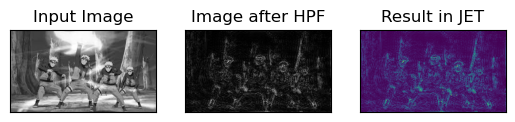

In [9]:
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])

plt.show()

high pass filtering is an edge detection operation. most of the image is present in low frequency domain anyway, so high pass filters can find the edges. 

in JET color, we cna find artifacts..., this is due to ringing effects. it is caused by by the rectangular window used for masking. this mask is converted into a sinc shape causing this problem. so, ractangular windows is not used for filtering, better option is gaussian windows. 